# Read Dataset

In [2]:
import pandas as pd
A = pd.read_csv("C:/Users/Lenovo/Downloads/Cars93 (1).csv")

In [3]:
A.columns=['id', 'Manufacturer', 'Model', 'Type', 'MinPrice', 'Price',
       'MaxPrice', 'MPGcity', 'MPGhighway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Revpermile',
       'Mantransavail', 'Fueltankcapacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turncircle', 'Rearseatroom', 'Luggageroom',
       'Weight', 'Origin', 'Make']

In [4]:
A.head(3)

,id,Manufacturer,Model,Type,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,AirBags,...,Passengers,Length,Wheelbase,Width,Turncircle,Rearseatroom,Luggageroom,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90


# Missing Data Treatment

In [5]:
from warnings import filterwarnings
filterwarnings("ignore")

In [7]:
from preprocessing_6PM import replacer
replacer(A)

# Drop Unwanted

In [8]:
A = A.drop(labels=["id","Make","Model"],axis=1)

# Define X and Y

In [9]:
X = A.drop(labels=["Origin"],axis=1)
Y = A[["Origin"]]

# Feature selection based on EDA

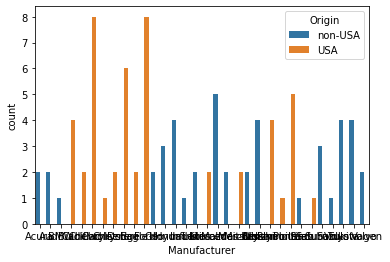

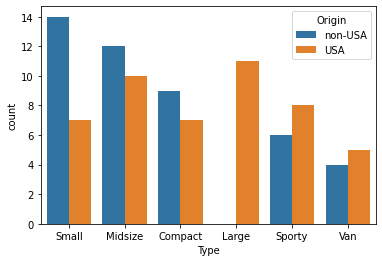

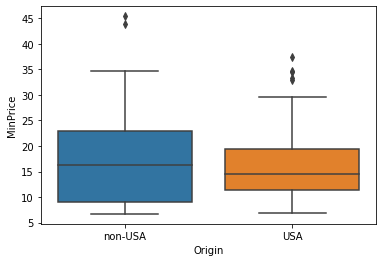

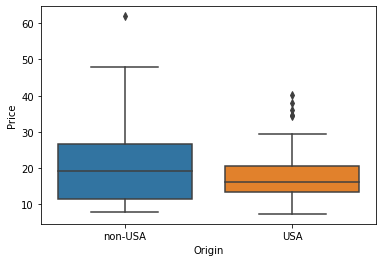

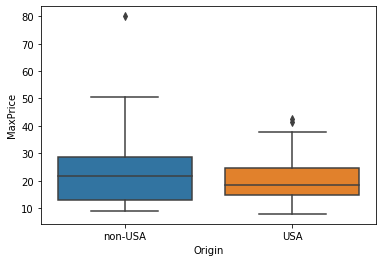

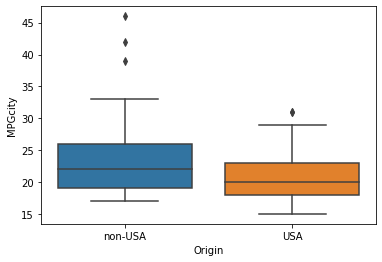

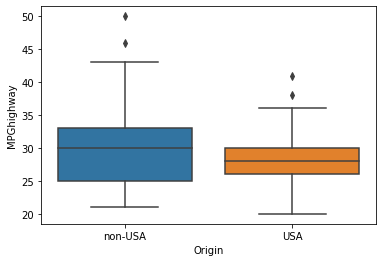

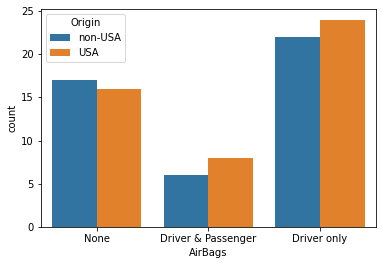

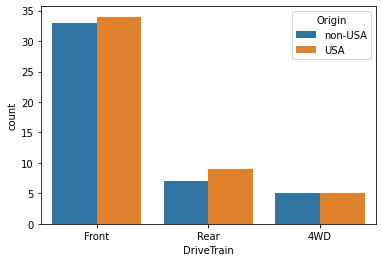

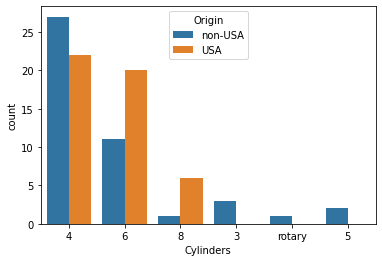

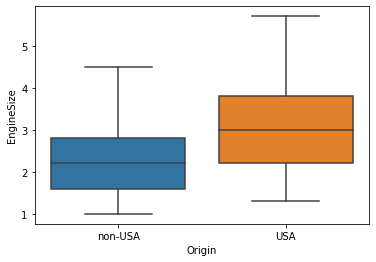

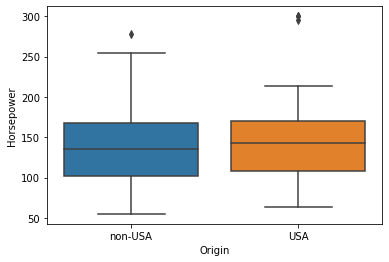

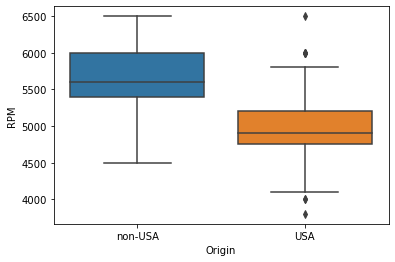

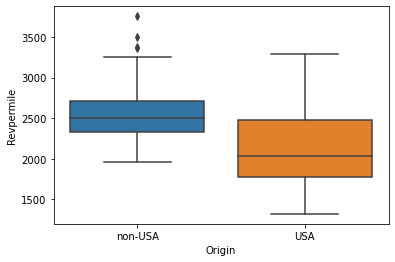

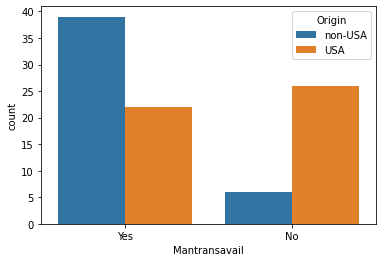

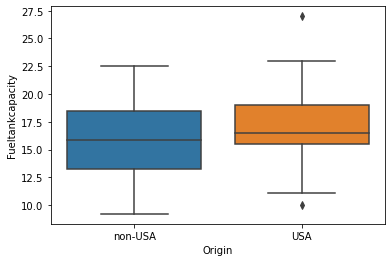

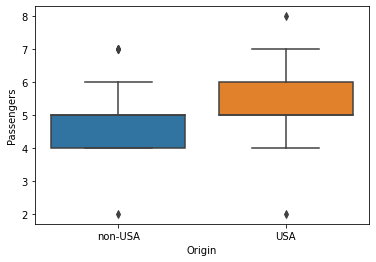

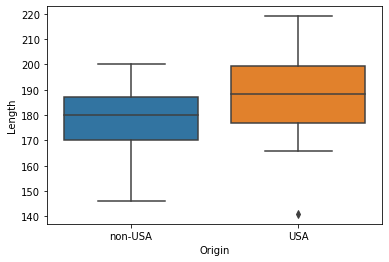

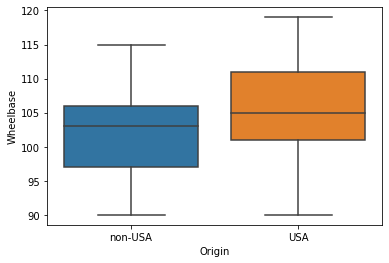

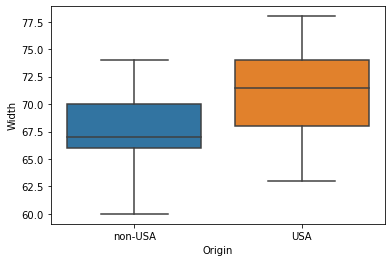

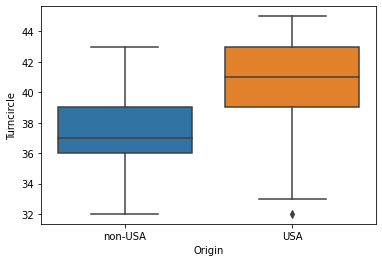

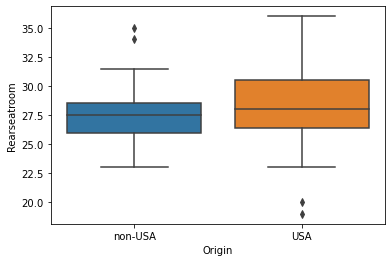

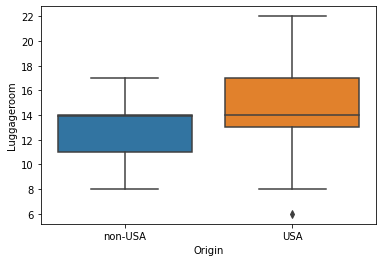

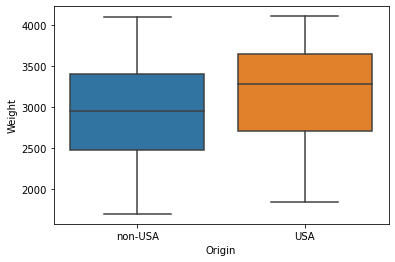

In [10]:
import seaborn as sb
import matplotlib.pyplot as plt
for i in X.columns:
    if(X[i].dtypes=="object"):
        sb.countplot(X[i],hue=Y.Origin)
        plt.show()
    else:
        sb.boxplot(Y.Origin,X[i])
        plt.show()

In [11]:
def ANOVA(df,cat,con):
    from pandas import DataFrame
    from statsmodels.api import OLS
    from statsmodels.formula.api import ols
    rel = con + " ~ " + cat
    model = ols(rel,df).fit()
    from statsmodels.stats.anova import anova_lm
    anova_results = anova_lm(model)
    Q = DataFrame(anova_results)
    a = Q['PR(>F)'][cat]
    return round(a,3)

In [12]:
imp_cols = []
for i in X.columns:
    if(X[i].dtypes!="object"):
        x = ANOVA(A,"Origin",i)
        if(x < 0.05):
            print("Origin vs ",i,"-->",x)
            imp_cols.append(i)

Origin vs  MPGcity --> 0.012
Origin vs  EngineSize --> 0.0
Origin vs  RPM --> 0.0
Origin vs  Revpermile --> 0.0
Origin vs  Passengers --> 0.017
Origin vs  Length --> 0.0
Origin vs  Wheelbase --> 0.008
Origin vs  Width --> 0.0
Origin vs  Turncircle --> 0.0
Origin vs  Luggageroom --> 0.002
Origin vs  Weight --> 0.038


In [13]:
imp_cols

['MPGcity',
 'EngineSize',
 'RPM',
 'Revpermile',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turncircle',
 'Luggageroom',
 'Weight']

In [14]:
from scipy.stats import chi2_contingency
def chisquare(df,cat1,cat2):
    import pandas as pd
    ct = pd.crosstab(df[cat1],df[cat2])
    a,b,c,d = chi2_contingency(ct)
    return b

In [15]:
for i in X.columns:
    if(X[i].dtypes=="object"):
        x = chisquare(A,"Origin",i)
        if(x < 0.05):
            print("Origin vs ",i,"-->",x)
            imp_cols.append(i)

Origin vs  Manufacturer --> 4.122990295732623e-08
Origin vs  Type --> 0.015110051037674505
Origin vs  Cylinders --> 0.027311274054126932
Origin vs  Mantransavail --> 8.71164011659194e-05


# Preprocessing

In [16]:
imp_cols

['MPGcity',
 'EngineSize',
 'RPM',
 'Revpermile',
 'Passengers',
 'Length',
 'Wheelbase',
 'Width',
 'Turncircle',
 'Luggageroom',
 'Weight',
 'Manufacturer',
 'Type',
 'Cylinders',
 'Mantransavail']

In [22]:
from preprocessing_6PM import data_prep
Xnew = data_prep(X)

# Split the Data in training and testing set

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# Create LR model

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

from sklearn.metrics import accuracy_score
tr_acc = accuracy_score(ytrain,pred_tr)
ts_acc = accuracy_score(ytest,pred_ts)


In [25]:
tr_acc

0.9594594594594594

In [26]:
ts_acc

0.8421052631578947